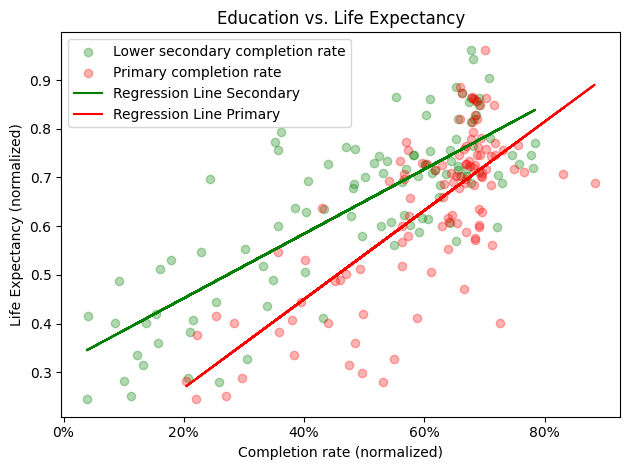

In [3]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("datasets/Normalized_Dataset_edu-prisectet.csv", usecols=['Year',"GDP", 'Country', "Value", "Indicator Name",  "Indicator Code", 'Life expectancy'])
second_df = df[df["Indicator Name"].str.contains("Lower secondary completion rate") == True]
third_df = df[df["Indicator Name"].str.contains("Primary completion rate") == True]
second_df.to_csv("datasets/Normalized_Dataset_edu-prisectet1.csv", index=False)
third_df.to_csv("datasets/Normalized_Dataset_edu-prisectet2.csv", index=False)

plt.scatter(second_df['Value'], second_df['Life expectancy'], alpha=0.3, c='green', label='Lower secondary completion rate')
plt.scatter(third_df['Value'], third_df['Life expectancy'], alpha=0.3, c='red', label='Primary completion rate')
plt.xlabel('Completion rate (normalized)')
plt.ylabel('Life Expectancy (normalized)')
plt.title('Education vs. Life Expectancy')

x_clean = second_df['Value']
y_clean = second_df['Life expectancy']

# Performing linear regression
slope, intercept = np.polyfit(x_clean, y_clean, 1)

# Calculate the values of the regression line
regression_line = slope * x_clean + intercept

# Create a combined scatter plot with the regression line
plt.plot(x_clean, regression_line, color='green', label='Regression Line Secondary')

x_clean = third_df['Value']
y_clean = third_df['Life expectancy']

# Performing linear regression
slope, intercept = np.polyfit(x_clean, y_clean, 1)

# Calculate the values of the regression line
regression_line = slope * x_clean + intercept
ax = plt.subplot(1,1,1)
# Create a combined scatter plot with the regression line
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.plot(x_clean, regression_line, color='red', label='Regression Line Primary')
plt.legend()
plt.tight_layout()
plt.show()